In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
np.seterr(divide='ignore')

data = pd.read_csv('C:/Users/david/Desktop/maturitni_prace/data_analysis_python/nelinearita.csv', sep=',', header=None)


threshold = 740             #hranice kde se meni z primky na linearne klesajici

energy = np.array([])       #tabulkova energie
difference = np.array([])   #rozdil mezi energii tabulkovou a energii namerenou
for j in range(31):
    energy = np.append(energy, float(data[0][j]))
    difference = np.append(difference, float(data[1][j]))

In [38]:
def fce(x, a, b):
    x = x - threshold
    return (a * (x)**2 + b * x ) /(1+np.exp(-2*10000*x))
    

C:\Users\david\AppData\Local\Temp\ipykernel_12352\1925145476.py:3: RuntimeWarning: overflow encountered in exp
  return (a * (x)**2 + b * x ) /(1+np.exp(-2*10000*x))


(-3.779, 0.6084199123664795)

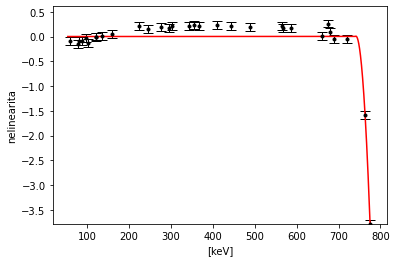

In [40]:
pars, cov = curve_fit(f=fce, xdata=energy, ydata=difference)

p = np.linspace(min(energy)-5, max(energy)+5, 100000)
plt.errorbar(energy, difference, yerr=0.08, fmt=".", elinewidth=1, capsize=5, ecolor='black',color='black')
plt.plot(p, fce(p, *pars), c="red")
plt.ylabel("nelinearita")
plt.xlabel("[keV]")
plt.ylim(ymin=min(difference))